In [1]:
import numpy as np
import pandas as pd
import codecs 
import os
import os.path
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from class_thermaldata import ThermalData

path = os.path.join( os.getcwd(), 'data_collect128_5/raw_data_eta/' )

#paths = [os.path.join( os.getcwd(), 'data_collect128_2/raw_data_ensemble/' ), 
#         os.path.join( os.getcwd(), 'data_collect128_2/raw_data_ensemble/' )]
run_id = 'run.2201'
thermal = ThermalData()

In [2]:
# Scan all quantities
thermal.read_infos(path)
quantity = {'TotalEnergy' : 'energy',
            'KineticEnergy' : 'E_kinetic',
            'GradEnergy' : 'E_grad',
            'PotentialEnergy' : 'E_pot',
            'U1Energy' : 'E_U1',
            'SU2Energy' : 'E_SU2',
            'MagneticEnergy' : 'EM_energy',
            'ElectricEnergy' : 'EM_electricEnergy',
            'Higgs2' : 'Higgs_mag2'
            } 
thermal.assign_pt_end_crit(0.25, 10)
'''
for data64 I am using (0.65, 10)
'''
try:
    s = thermal.add_info_source_xls('../fft.xlsx')
except:
    pass

thermal.scan_pt_end_points()
thermal.scan_pt_end_quantities(quantity)
thermal.scan_run_data_quantities()
thermal.output_info_to_html(is_output_short = False)
thermal.output_info_to_csv()

In [ ]:
# Scan all quantities from different folders
thermal.read_multi_infos(paths)
quantity = {'TotalEnergy' : 'energy',
            'KineticEnergy' : 'E_kinetic',
            'GradEnergy' : 'E_grad',
            'PotentialEnergy' : 'E_pot',
            'U1Energy' : 'E_U1',
            'SU2Energy' : 'E_SU2',
            'MagneticEnergy' : 'EM_energy',
            'ElectricEnergy' : 'EM_electricEnergy',
            'Higgs2' : 'Higgs_mag2'
            }
thermal.scan_run_data_quantities()
thermal.assign_pt_end_crit(0.25, 10)
'''
for data64 I am using (0.65, 10)
'''
try:
    s = thermal.add_info_source_xls('../fft.xlsx')
except FileNotFoundError:
    pass

thermal.scan_pt_end_points()
thermal.scan_pt_end_quantities(quantity)
thermal.output_info_to_html(is_output_short = False)

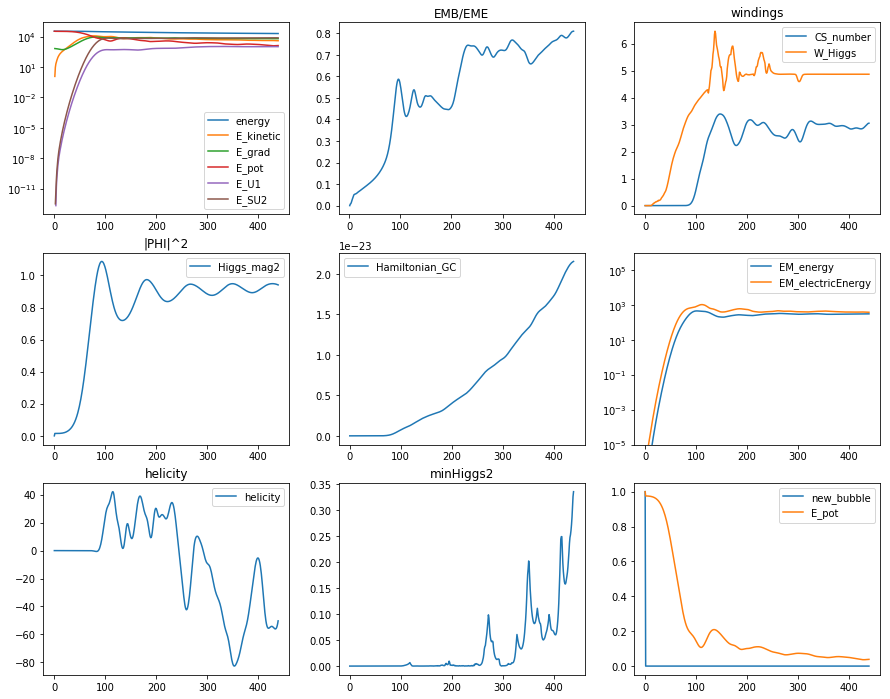

In [6]:
# Plot one run
thermal.read_path(path)
thermal.plot_one_run_data(run_id, is_save_ = False)

In [ ]:
# Plot all runs
thermal.read_infos(path)
thermal.plot_all_runs()

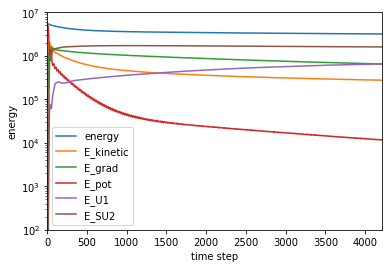

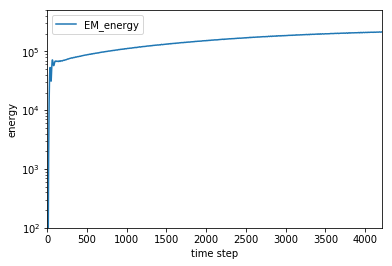

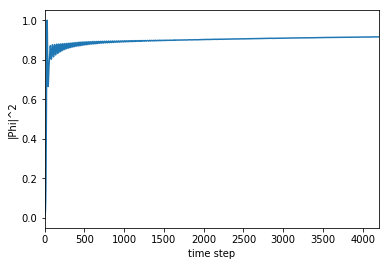

In [12]:
# Plot for PPT
# only plot energy components, EM energy and Higgs_mag2
thermal.read_path(path)
thermal.read_single_run_data(run_id)
plt.figure()
thermal.one_data[['energy','E_kinetic','E_grad','E_pot','E_U1','E_SU2']] \
.plot(logy=True, ylim = (10**2,10**7))
plt.xlabel('time step')
plt.ylabel('energy')
#plt.savefig('energy_comp.png')
plt.show()

plt.figure()
thermal.one_data[['EM_energy']].plot(logy=True, ylim=(10**2, 5*10**5))
plt.xlabel('time step')
plt.ylabel('energy')
#plt.savefig('EMenergy.png')
plt.show()

plt.figure()
#(thermal.one_data['Higgs_mag2']/thermal.one_data['Higgs_mag2'].max()).plot()
(thermal.one_data['Higgs_mag2']/thermal.one_data['Higgs_mag2'].max()).plot()
plt.xlabel('time step')
plt.ylabel('|Phi|^2')
#plt.savefig('Higgs2.png')
plt.show()

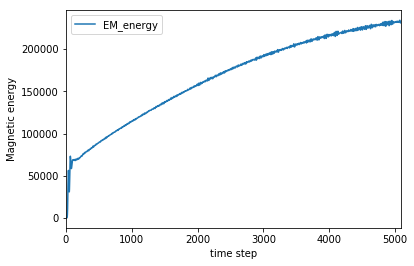

In [3]:
thermal.read_path(path)
thermal.read_single_run_data(run_id)
plt.figure()
thermal.one_data[['EM_energy']].plot(logy=False)
plt.xlabel('time step')
plt.ylabel('Magnetic energy')
#plt.savefig('EMenergy.png')
plt.show()


# Fitting the data

In [ ]:
plotQuantity = 'TotalBubbles'
stop_id = '0.25'

params = ['NucleationProbability', 'Higgs_damping']
nucl = params[0]
damp = params[1]
nucl_vals = thermal.df_info[nucl].unique()
damp_vals = thermal.df_info[damp].unique()

In [ ]:
# fixing damping

plt.figure()
fit_vals_d = np.zeros([0,2])
for v in damp_vals:
    new_val = thermal.fit(nucl, plotQuantity, \
                     damp, v, logx_ = True, logy_ = True, \
                     scatter_only_ = False)
    fit_vals_d = np.append(fit_vals_d, [new_val], axis = 0)

ax = plt.gca()
text = "slope = " + str('%.4f' % fit_vals_d[:,0].mean() )
ax.text(0.95, 1.05, text, \
     verticalalignment='top', horizontalalignment='right', transform=ax.transAxes)
plt.legend(bbox_to_anchor=(0.01, 1), loc = 'upper left')
plt.savefig(plotQuantity + '.' + stop_id + '.fixd.png')

# if some quantity has a weak dependence, then either logy = True or False will have a good fit.

In [ ]:
# fixing nucleation probability
plt.figure()
fit_vals_n = np.zeros([0,2])
for v in nucl_vals:
    new_val = thermal.fit(damp, plotQuantity, \
                     nucl, v, logx_ = True, logy_ = True, \
                     scatter_only_ = False)
    fit_vals_n = np.append(fit_vals_n, [new_val], axis = 0)

ax = plt.gca()
text = "slope = " + str('%.4f' % fit_vals_n[:,0].mean() )
ax.text(0.98, 1.05, text, \
     verticalalignment='top', horizontalalignment='right', transform=ax.transAxes)
plt.legend(bbox_to_anchor=(1.0, 1), loc = 'best')
#plt.savefig(plotQuantity + '.' + stop_id + '.fixp.png')

In [ ]:
# percolation relation
# PercolationSize will not be related to magnetic or electric energy
plt.figure()
popt = thermal.fit_general('PercolationSize', plotQuantity, logx_ = True, logy_ = True)
ax = plt.gca()
text = "slope = " + str('%.4f' % popt[0] )
ax.text(0.98, 1.05, text, \
     verticalalignment='top', horizontalalignment='right', transform=ax.transAxes)
#plt.savefig(plotQuantity + '.perco.png')

# Combine data


In [ ]:
import numpy as np
import pandas as pd
import codecs
import os.path

# combine data (csv files) from several different folders into one csv file.
root_path = os.path.dirname(__file__)
'''
f1 = pd.read_csv(os.path.join(root_path, 'data_collect64_2/list_info.csv'))
f2 = pd.read_csv(os.path.join(root_path, 'data_collect128_2/list_info.csv'))
f3 = pd.read_csv(os.path.join(root_path, 'data_collect64_3.1/list_info.csv'))
f4 = pd.read_csv(os.path.join(root_path, 'data_collect64_3.2/list_info.csv'))
f5 = pd.read_csv(os.path.join(root_path, 'data_collect64_3.3/list_info.csv'))
fc = pd.concat([f1, f2, f3, f4, f5]).reset_index(drop = True)
fc.to_csv('combined.csv')
'''

df = pd.read_excel(os.path.join(root_path, 'two_bubbles_1/fft1.xlsx'), \
                   index_col = [0,1])